# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---

## Step 1: Dataset Exploration

Visualize the German Traffic Signs Dataset. This is open ended, some suggestions include: plotting traffic signs images, plotting the count of each sign, etc. Be creative!


The pickled data is a dictionary with 4 key/value pairs:

- features -> the images pixel values, (width, height, channels)
- labels -> the label of the traffic sign
- sizes -> the original width and height of the image, (width, height)
- coords -> coordinates of a bounding box around the sign in the image, (x1, y1, x2, y2)

In [27]:
from sklearn.preprocessing import LabelBinarizer
import numpy as np
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
import cv2
import time
from datetime import timedelta


In [3]:
# Load pickled data
import pickle


# TODO: fill this in based on where you saved the training and testing data
training_file = 'TrafficSignData/train.p'
testing_file = 'TrafficSignData/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)


(39209, 32, 32, 3)
(12630, 32, 32, 3)
(39209,)
(12630,)


In [4]:
### To start off let's do a basic data summary.
import tensorflow as tf

# TODO: number of training examples
n_train = 550

# TODO: number of testing examples
n_test = 100

# TODO: what's the shape of an image?
image_shape = tf.placeholder(tf.float32, [None, 1024])

# TODO: how many classes are in the dataset
# 43 because 43 signs
n_classes = 43

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 550
Number of testing examples = 100
Image data shape = Tensor("Placeholder:0", shape=(?, 1024), dtype=float32)
Number of classes = 43


In [13]:
# Convert image to grayscale 

def pre_process_image(image):
    
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return image.flatten()/255.

train_features = np.array([pre_process_image(X_train[i]) for i in range(len(X_train))],
                          dtype = np.float32)
test_features = np.array([pre_process_image(X_test[i]) for i in range(len(X_test))],
                          dtype = np.float32)

In [14]:
np.shape(train_features)

(39209, 1024)

In [7]:
'''

I wouldnt modify X_train or X_test. 
 
# Flatten the images for greyscale
#print (X_train.shape)
#print (y_train.shape)
#print (X_test.shape)
#print (y_test.shape)

X_train = X_train.reshape(39209, 32*32*3)
X_test = X_test.reshape(12630, 32*32 *3)

print (X_train.shape)
print (y_train.shape)
print (X_test.shape)

print (y_test.shape)
'''

'\n\nI wouldnt modify X_train or X_test. \n \n# Flatten the images for greyscale\n#print (X_train.shape)\n#print (y_train.shape)\n#print (X_test.shape)\n#print (y_test.shape)\n\nX_train = X_train.reshape(39209, 32*32*3)\nX_test = X_test.reshape(12630, 32*32 *3)\n\nprint (X_train.shape)\nprint (y_train.shape)\nprint (X_test.shape)\n\nprint (y_test.shape)\n'

In [9]:
'''
# Implement Min-Max scaling for greyscale image data
def normalize_greyscale(image_data):
    
    a = 0.1
    b = 0.9
    Xmin = 0
    X = image_data
    Xmax = 255
    return 0.1 + ((X-Xmin)*(b-a)/(Xmax - Xmin))

train_features = normalize_greyscale(X_train)
test_features = normalize_greyscale(X_test)
is_features_normal = True

print ('Tests passed!')
'''

"\n# Implement Min-Max scaling for greyscale image data\ndef normalize_greyscale(image_data):\n    \n    a = 0.1\n    b = 0.9\n    Xmin = 0\n    X = image_data\n    Xmax = 255\n    return 0.1 + ((X-Xmin)*(b-a)/(Xmax - Xmin))\n\ntrain_features = normalize_greyscale(X_train)\ntest_features = normalize_greyscale(X_test)\nis_features_normal = True\n\nprint ('Tests passed!')\n"

In [10]:
# Turn labels into numbers and apply One-Hot Encoding
encoder = LabelBinarizer()
encoder.fit(y_train)
train_labels = encoder.transform(y_train)
test_labels = encoder.transform(y_test)

# Change to float32, so that it can be multiplied against the features in TensorFlow which are float32
train_labels = train_labels.astype(np.float32)
test_labels = test_labels.astype(np.float32)
is_labels_encod = True

print ('Labels One-Hot Encoded')

Labels One-Hot Encoded


In [16]:
# Get randomized datasets for training and validation

train_features, valid_features, train_labels, valid_labels = train_test_split(
    train_features,
    train_labels,
    test_size = 0.05,
    random_state = 832289)

print ('Training features and labels randomized and split')
print (train_features.shape)
print (train_labels.shape)


Training features and labels randomized and split
(35385, 1024)
(35385, 43)


In [ ]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Your model can be derived from a deep feedforward net or a deep convolutional network.
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [19]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
import tensorflow as tf

features_count = train_features.shape[1]
#features_count = 3072

#labels_count = 43
labels_count = train_labels.shape[1]

#print (train_features.shape[0])
#print (train_labels.shape[0])

features = tf.placeholder(tf.float32, [None, train_features.shape[1]])
labels = tf.placeholder(tf.float32, [None, train_labels.shape[1]])


print (train_features.shape[0])
print (train_labels.shape[0])

#features = tf.placeholder(tf.float32)
#labels = tf.placeholder(tf.float32)

weights = tf.Variable(tf.truncated_normal((features_count, labels_count)))
biases = tf.Variable(tf.zeros(labels_count))

print (features)
print (labels)



train_dict = {features: train_features, labels: train_labels}
valid_dict = {features: valid_features, labels: valid_labels}
test_dict = {features: test_features, labels: test_labels}
#train_dict = {features: X_train, labels: y_train}
#test_dict = {features: X_test, labels: y_test}


#Linear Function WX + b
logits = tf.matmul(features, weights) + biases

prediction = tf.nn.softmax(logits)

print ('prediction ', prediction)

# Cross entropy commented out to use Vivek's code 
#cross_entropy = -tf.reduce_sum(labels * tf.log(prediction), reduction_indices =1)
#print ("cross entropy", cross_entropy)
#tf.Print(cross_entropy, [cross_entropy])

cross_entropy = tf.reduce_mean(-tf.reduce_sum(labels * tf.log(tf.clip_by_value(prediction,1e-10,1.0)), 
                                              reduction_indices=[1]))

#Training loss
loss = tf.reduce_mean(cross_entropy)
print ("loss ", loss)

# Create an operation that initializes all variables
init = tf.initialize_all_variables()

# Test Cases
with tf.Session() as session:
    session.run(init)
    session.run(loss, feed_dict = train_dict)
    session.run(loss, feed_dict = test_dict)
    biases_data = session.run(biases)
    
assert not np.count_nonzero(biases_data), 'biases must be zeroes'

print ('Tests passed')

35385
35385
Tensor("Placeholder_5:0", shape=(?, 1024), dtype=float32)
Tensor("Placeholder_6:0", shape=(?, 43), dtype=float32)
prediction  Tensor("Softmax_2:0", shape=(?, 43), dtype=float32)
loss  Tensor("Mean_1:0", shape=(), dtype=float32)
Tests passed


In [20]:
# Determine if the predictions are correct
is_correct_prediction = tf.equal(tf.argmax(prediction, 1), tf.argmax(labels, 1))
print ('is_correct_prediction', is_correct_prediction)
#Calculate the accuracy of the predictions
accuracy = tf.reduce_mean(tf.cast(is_correct_prediction, tf.float32))
print ('accuracy', accuracy)
print('Accuracy function created')

is_correct_prediction Tensor("Equal:0", shape=(?,), dtype=bool)
accuracy Tensor("Mean_2:0", shape=(), dtype=float32)
Accuracy function created


training accuracy at 0.024219302460551262
Validation accuracy at 0.0236178208142519
training accuracy at 0.41788893938064575
Validation accuracy at 0.41492217779159546
training accuracy at 0.5948848128318787
Validation accuracy at 0.5850778222084045
training accuracy at 0.6648014783859253
Validation accuracy at 0.654321014881134
training accuracy at 0.7121661901473999
Validation accuracy at 0.6929683089256287
training accuracy at 0.7388724088668823
Validation accuracy at 0.7208803296089172
training accuracy at 0.761904776096344
Validation accuracy at 0.7455716729164124
training accuracy at 0.7805567383766174
Validation accuracy at 0.761674702167511
training accuracy at 0.7940935492515564
Validation accuracy at 0.7718732953071594
training accuracy at 0.8054260015487671
Validation accuracy at 0.7847557663917542
training accuracy at 0.8151476383209229
Validation accuracy at 0.7917337417602539
training accuracy at 0.8230606317520142
Validation accuracy at 0.8013955950737
training accuracy 

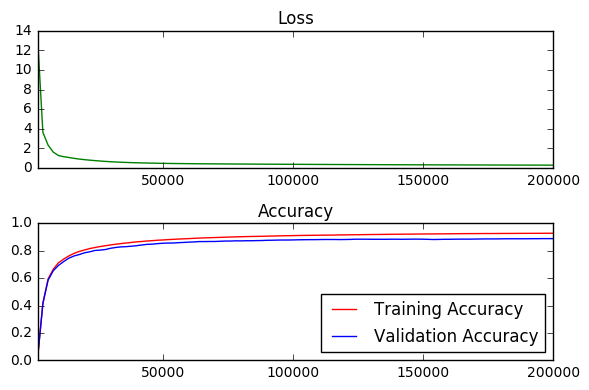

Validation accuracy at 0.8910359740257263
Time usage: 0:02:20


In [41]:
import tensorflow as tf
from tqdm import tqdm
import math
import matplotlib.pyplot as plt

# Parameters
training_epochs = 100
batch_size = 20
learning_rate = 0.24

### DON'T MODIFY ANYTHING BELOW ###
# Gradient Descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)    

# The accuracy measured against the validation set
validation_accuracy = 0.0

# Measurements use for graphing loss and accuracy
log_batch_step = 2000
batches = []
loss_batch = []
train_acc_batch = []
valid_acc_batch = []


start_time = time.time()

# Initializing the variables
init = tf.initialize_all_variables()

# Launch the graph

sess = tf.Session()
sess.run(init)
batch_count = int(math.ceil(len(train_features)/batch_size))
# Training cycle
for epoch_i in range(training_epochs):

    # Progress bar
    #batches_pbar = tqdm(range(batch_count), desc='Epoch {:>2}/{}'.format(epoch_i+1, training_epochs),unit='batches')

    # The training cycle
    for batch_i in range(1000):
        # Get a batch of training features and labels
        batch_start = batch_i*batch_size
        batch_features = train_features[batch_start:batch_start+batch_size]
        batch_labels = train_labels[batch_start:batch_start + batch_size]

        # Run optimizer and get loss
        _, l = sess.run([optimizer, loss],feed_dict= {features: batch_features,labels: batch_labels})

        # Log every 50 batches
        if not batch_i % log_batch_step:
            # Calculate Training and Validation accuracy
            training_accuracy = sess.run(accuracy, feed_dict=train_dict)
            validation_accuracy = sess.run(accuracy, feed_dict=valid_dict)

            # Log batches
            previous_batch = batches[-1] if batches else 0
            batches.append(log_batch_step + previous_batch)
            loss_batch.append(l)
            train_acc_batch.append(training_accuracy)
            print('training accuracy at {}'.format(training_accuracy))
            valid_acc_batch.append(validation_accuracy)
            print('Validation accuracy at {}'.format(validation_accuracy))

    # Check accuracy against testing data #change later to check against validation data
    validation_accuracy = sess.run(accuracy, feed_dict=valid_dict)

sess.close()
        
loss_plot = plt.subplot(211)
loss_plot.set_title('Loss')
loss_plot.plot(batches, loss_batch, 'g')
loss_plot.set_xlim([batches[0], batches[-1]])
acc_plot = plt.subplot(212)
acc_plot.set_title('Accuracy')

acc_plot.plot(batches, train_acc_batch, 'r', label='Training Accuracy')
acc_plot.plot(batches, valid_acc_batch, 'b', label='Validation Accuracy')
acc_plot.set_ylim([0, 1.0])
acc_plot.set_xlim([batches[0], batches[-1]])
acc_plot.legend(loc=4)
plt.tight_layout()
plt.show()

print('Validation accuracy at {}'.format(validation_accuracy))

        



end_time = time.time()
time_dif = end_time - start_time

print("Time usage: " + str(timedelta(seconds=int(round(time_dif)))))











### Question 1 

_Describe the techniques used to preprocess the data._

**Answer:**

In [ ]:
### Generate data additional (if you want to!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

### Question 2

_Describe how you set up the training, validation and testing data for your model. If you generated additional data, why?_

**Answer:**

In [ ]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

In [ ]:
### Train your model here.
### Feel free to use as many code cells as needed.

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

### Question 5


_What approach did you take in coming up with a solution to this problem?_

**Answer:**

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It would be helpful to plot the images in the notebook._



**Answer:**

In [ ]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

### Question 7

_Is your model able to perform equally well on captured pictures or a live camera stream when compared to testing on the dataset?_


**Answer:**

In [ ]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.11/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*


**Answer:**

### Question 9
_If necessary, provide documentation for how an interface was built for your model to load and classify newly-acquired images._


**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.